In [5]:
from src import cptec_merge

In [ ]:
# Baixando dados horarios do dia atual
# Serão salvos na mesma pasta do script
# baixa dados até a hora atual. Se já houver dados prévios, serão sobrescritos
cptec_merge.baixar_dados(discretizacao='hora',hoje=True)

# Baixando dados horarios de um dia específico
# Serão salvos na pasta teste
cptec_merge.baixar_dados(discretizacao='hora',data_string='21-07-2021', diretorio_saida='teste')

# Baixando dado diario do dia atual
# Serão salvos na mesma pasta do script
cptec_merge.baixar_dados(discretizacao='diario',hoje=True)

# Baixando dado diario de um dia específico
# Serão salvos na pasta teste
cptec_merge.baixar_dados(discretizacao='diario',data_string='21-07-2021', diretorio_saida='teste')

In [6]:
cptec_merge.baixar_dados(discretizacao='diario',hoje=True)

MERGE_CPTEC_20210928.grib2 [ok]


'MERGE_CPTEC_20210928.grib2'

In [8]:
import requests
from pathlib import Path
import pendulum
import sys
import os

caminho_base = os.getcwd()

In [16]:
caminho_base

'/mnt/c/scripts/smapy'

In [72]:
import rioxarray
import xarray as xr
import geopandas as gpd
import os
import pandas as pd

In [10]:
contornos = gpd.read_file(f"{caminho_base}/contornos/contornos_smap.shp")

In [33]:
for nome_contorno, geometria in zip(contornos.Nome, contornos.geometry):
    

Barra Bonita-Promissão
São Simão
Três Marias
Itá
Foz do Areia
Serra da Mesa
Capivara
Furnas
Água Vermelha
Emborcação
Rosana
Promissão
Tocantins
Itaipu
Sobradinho
Barra Bonita
Iguaçu


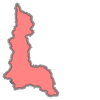

In [86]:
contornos.geometry[9]

In [84]:
contornos

,Nome,FID,geometry
0,Barra Bonita-Promissão,NaN,"POLYGON ((-49.51100 -20.81469, -49.50097 -20.8..."
1,São Simão,NaN,"POLYGON ((-47.48836 -15.45417, -47.48396 -15.4..."
2,Três Marias,NaN,"MULTIPOLYGON (((-45.81222 -20.46639, -45.81188..."
3,Itá,NaN,"MULTIPOLYGON (((-50.74444 -28.62556, -50.74454..."
4,Foz do Areia,NaN,"MULTIPOLYGON (((-50.84889 -26.74778, -50.84898..."
5,Serra da Mesa,NaN,"MULTIPOLYGON (((-49.01139 -16.14137, -49.01106..."
6,Capivara,NaN,"MULTIPOLYGON (((-49.96473 -25.49971, -49.96482..."
7,Furnas,NaN,"MULTIPOLYGON (((-45.47389 -22.71944, -45.47355..."
8,Água Vermelha,NaN,"MULTIPOLYGON (((-45.47389 -22.71944, -45.47355..."
9,Emborcação,NaN,"MULTIPOLYGON (((-47.75861 -18.80777, -47.75871..."


In [2]:
from src import cfs
import pendulum

In [3]:
cfs.baixa_mensal(hoje=True)

cfs.20210928/00/monthly_grib_01/pgbf.01.2021092800.202110.avrg.grib.grb2 [ok]
cfs.20210928/00/monthly_grib_01/pgbf.01.2021092800.202111.avrg.grib.grb2 [ok]
cfs.20210928/00/monthly_grib_01/pgbf.01.2021092800.202112.avrg.grib.grb2 [ok]
cfs.20210928/00/monthly_grib_01/pgbf.01.2021092800.202201.avrg.grib.grb2 [ok]
cfs.20210928/00/monthly_grib_01/pgbf.01.2021092800.202202.avrg.grib.grb2 [ok]
cfs.20210928/00/monthly_grib_01/pgbf.01.2021092800.202203.avrg.grib.grb2 [ok]
cfs.20210928/00/monthly_grib_01/pgbf.01.2021092800.202204.avrg.grib.grb2 [ok]
cfs.20210928/00/monthly_grib_01/pgbf.01.2021092800.202205.avrg.grib.grb2 [ok]


'arquivo baixados'

In [94]:
dados = xr.open_dataset("pgbf.01.2021092800.202110.avrg.grib.grb2", filter_by_keys={'typeOfLevel': 'surface'})
#dados_full = dados.tp + dados.acpcp + dados.ncpcp
dados

<xarray.Dataset>
Dimensions:     (latitude: 181, longitude: 360)
Coordinates:
    time        datetime64[ns] ...
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 90.0 89.0 88.0 87.0 ... -88.0 -89.0 -90.0
  * longitude   (longitude) float64 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
    valid_time  datetime64[ns] ...
Data variables:
    tp          (latitude, longitude) float32 ...
    acpcp       (latitude, longitude) float32 ...
    ncpcp       (latitude, longitude) float32 ...
    csnow       (latitude, longitude) float32 ...
    cicep       (latitude, longitude) float32 ...
    cfrzr       (latitude, longitude) float32 ...
    crain       (latitude, longitude) float32 ...
    lftx        (latitude, longitude) float32 ...
    cape        (latitude, longitude) float32 ...
    cin         (latitude, longitude) float32 ...
    4lftx       (latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP 
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP 
    history:                 2021-09-29T00:05 GRIB to CDM+CF via cfgrib-0.9.9...

In [68]:
dados = xr.open_dataset('MERGE_CPTEC_20210928.grib2')
dados = dados.prec
dados

<xarray.DataArray 'prec' (latitude: 924, longitude: 1001)>
[924924 values with dtype=float32]
Coordinates:
    time        datetime64[ns] ...
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 -60.05 -59.95 -59.85 ... 32.05 32.15 32.25
  * longitude   (longitude) float64 239.9 240.0 240.1 ... 339.8 339.9 340.0
    valid_time  datetime64[ns] ...
Attributes: (12/29)
    GRIB_paramId:                             260138
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      924924
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_name:                                Precipitation
    GRIB_shortName:                           prec
    GRIB_units:                               kg m**-2
    long_name:                                Precipitation
    units:                                    kg m**-2
    standard_name:                            unknown

In [74]:
preparar_para_recorte(dados)

<xarray.DataArray 'prec' (latitude: 924, longitude: 1001)>
[924924 values with dtype=float32]
Coordinates:
    time         datetime64[ns] 2021-09-28T12:00:00
    step         timedelta64[ns] 00:00:00
    surface      float64 0.0
  * latitude     (latitude) float64 -60.05 -59.95 -59.85 ... 32.05 32.15 32.25
  * longitude    (longitude) float64 239.9 240.0 240.1 ... 339.8 339.9 340.0
    valid_time   datetime64[ns] 2021-09-28T12:00:00
    lon          (longitude) float64 -120.1 -120.0 -119.9 ... -20.15 -20.05
    spatial_ref  int64 0
Attributes: (12/29)
    GRIB_paramId:                             260138
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      924924
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_name:                                Precipitation
    GRIB_shortName:                           prec
    GRIB_units:                               kg m**-2
    long_name:                                Precipitation
    units:                                    kg m**-2
    standard_name:                            unknown

In [82]:
media_bacia.values

array(0.45833334, dtype=float32)

In [93]:
import rioxarray
import xarray as xr
import geopandas as gpd

def preparar_para_recorte(dataset, crs="epsg:4326", xdim="longitude", ydim="latitude"):
    dataset = dataset.assign_coords(longitude=(((dataset.longitude + 180) % 360) - 180)).sortby(xdim)
    dataset = dataset.rio.set_spatial_dims(x_dim=xdim, y_dim=ydim) 
    dataset = dataset.rio.write_crs(crs)
    return dataset



contornos = gpd.read_file(f"{caminho_base}/contornos/contornos_smap.shp")
qtd_de_bacias = len(contornos)

for shape in range(0,qtd_de_bacias):
    
    shape = 10 if shape == 9 else shape # tá dando ruim no shape número 9
    # leitura, preparação e recorte dos dados
    dados = xr.open_dataset("pgbf.01.2021092800.202112.avrg.grib.grb2", filter_by_keys={'typeOfLevel': 'surface'})
    #dados = xr.open_dataset('MERGE_CPTEC_20210928.grib2')
    dados = dados.tp + dados.acpcp + dados.ncpcp
    dados_preparados = preparar_para_recorte(dados)
    dados_recortados = dados_preparados.rio.clip([contornos.geometry[shape]], "epsg:4326")
    
    # cálculo da média da bacia
    media_bacia = dados_recortados.mean(dim=["latitude", "longitude"])
    
    print(f'bacia:{contornos.Nome[shape]} | Média: {media_bacia.values}')

bacia:Barra Bonita-Promissão | Média: 2.8580000400543213
bacia:São Simão | Média: 5.662285327911377
bacia:Três Marias | Média: 3.001666784286499
bacia:Itá | Média: 3.4579997062683105
bacia:Foz do Areia | Média: 3.1683332920074463
bacia:Serra da Mesa | Média: 6.958000183105469
bacia:Capivara | Média: 3.651124954223633
bacia:Furnas | Média: 3.133000135421753
bacia:Água Vermelha | Média: 3.525249719619751
bacia:Rosana | Média: 3.6681108474731445
bacia:Rosana | Média: 3.6681108474731445
bacia:Promissão | Média: 3.392500162124634
bacia:Tocantins | Média: 4.842790126800537
bacia:Itaipu | Média: 3.033642530441284
bacia:Sobradinho | Média: 4.2318220138549805
bacia:Barra Bonita | Média: 3.927000045776367
bacia:Iguaçu | Média: 2.9956002235412598
